# Namakan Lake Outflows

The purpose of this notebook is to create a data series for the outflows from Namakan Lake. The data series is written to a file `NL_outflow.pkl` that can be read into other notebooks using `NL = pd.read_pickle('../data/NL_outflow.pkl')`.

The data series is constructed using data provided by Matt DeWolfe of the International Joint Commission.

## Read Data 

In [1]:
# Display graphics inline with the notebook
%matplotlib notebook

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import requests

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

NL_outflow = pd.read_excel('../data/Namakan_Outflows.xls',index_col=0,header=3)['Stn 47']


<IPython.core.display.Javascript object>


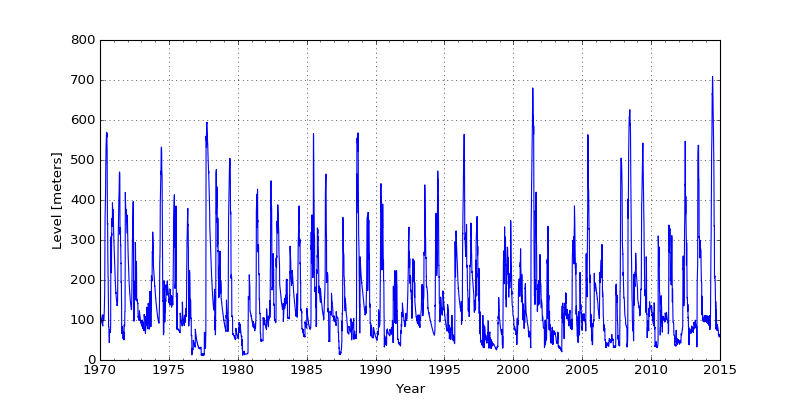

In [2]:
plt.figure(figsize=(10,5))

plt.hold(True)
NL_outflow.plot()
plt.hold(False)
plt.xlabel('Year')
plt.ylabel('Level [meters]')
plt.grid()

In [4]:
RLLevelFlow = pd.read_csv('../data/RLLevelFlow.csv',index_col=0,parse_dates=True)
RL_inflow = RLLevelFlow['Inflow']

<IPython.core.display.Javascript object>


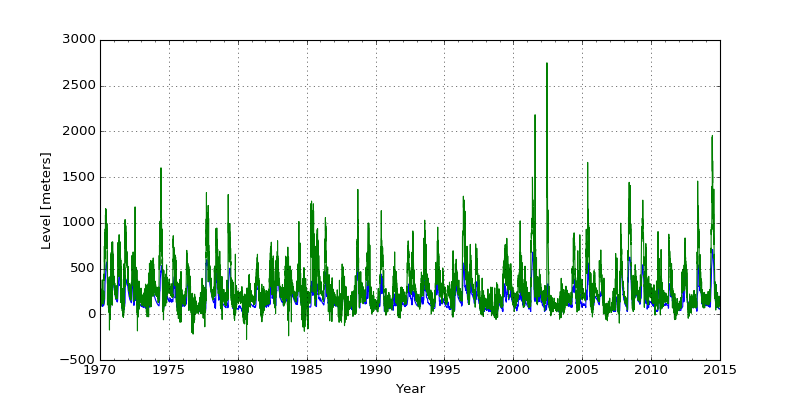

In [5]:
plt.figure(figsize=(10,5))

plt.hold(True)
NL_outflow.plot()
RL_inflow.plot()
plt.hold(False)
plt.xlabel('Year')
plt.ylabel('Level [meters]')
plt.grid()

<IPython.core.display.Javascript object>


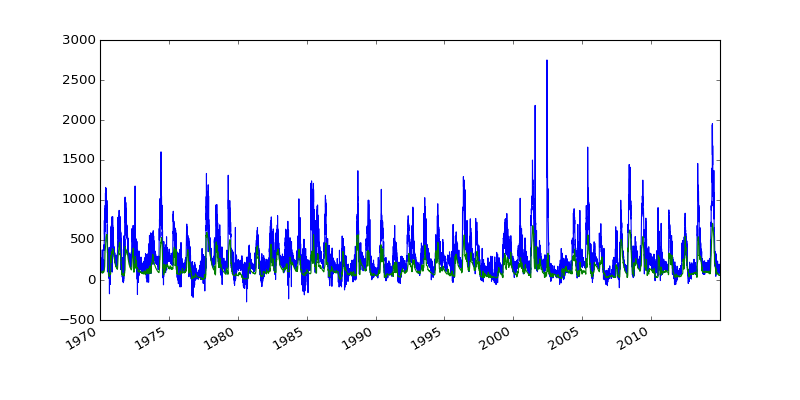

In [115]:
flows = pd.concat([RL_inflow,NL_outflow],axis=1).dropna()

plt.figure(figsize=(10,5))
plt.hold(True)

flows['Inflow'].plot()
flows['Stn 47'].plot()

<IPython.core.display.Javascript object>


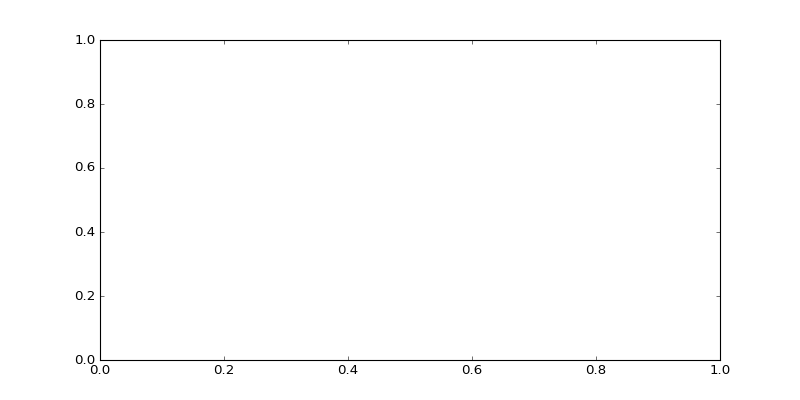

NameError: name 'flows' is not defined

In [6]:
plt.figure(figsize=(10,5))

plt.hold(True)
plt.plot(flows.ix['1970':'1999','Inflow'],flows.ix['1970':'1999','Stn 47'],'.',ms=5,color='b',alpha=0.6)
plt.plot(flows.ix['2000':,'Inflow'],flows.ix['2000':,'Stn 47'],'.',ms=5,color='r',alpha=0.6)

plt.xlim(0,2000)
plt.ylim(0,1000)
plt.grid()
plt.title('Namakan Outflow vs Rainy Lake Inflow, Daily for 1970-2014')
plt.ylabel('Namakan Outflow [cubic meters/sec]')
plt.xlabel('Rainy Lake Inflow [cubic meters/sec]')

In [125]:
q = (flows['Stn 47']/flows['Inflow'])
plt.ylim(0,1)
q.plot(makers='.')

TypeError: There is no Line2D property "makers"

<IPython.core.display.Javascript object>


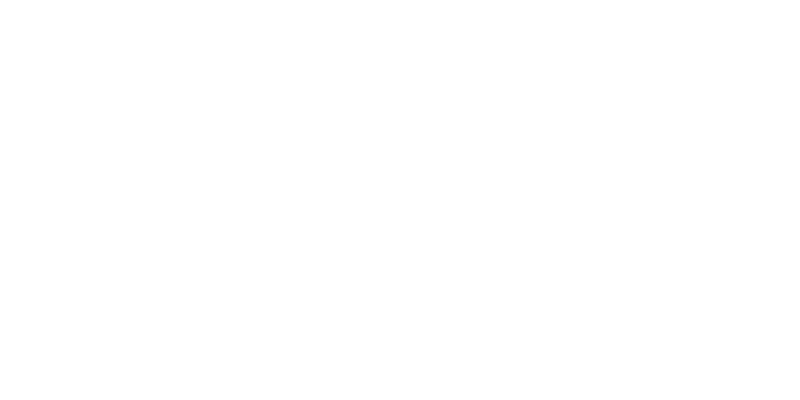

NameError: name 'q' is not defined

In [7]:
plt.figure(figsize=(10,5))
q = q[q > 0]
q = q[q < 1]
q.hist(bins=100,normed=True)
plt.xlim(0,1)
print q.mean()

## Data Reconciliation

In [61]:
NL.to_pickle('../data/NL.pkl')